In [129]:
import pandas as pd
import seaborn as sns
import numpy as np

import collections
import matplotlib.pyplot as plt
%matplotlib inline

## New - With the implementation of eADMS in 2006, the "Events_Sequence" table will replace the "Occurrences"
## table and the "Findings" table will replace the "Seq_of_events" table.

Events_Sequence = pd.read_csv('Events_Sequence.txt', sep = '\t')  ## eADMS coding for accidents after 2006
aircraft = pd.read_excel('aircraft.xlsx')
occurrences = pd.read_csv('Occurrences.txt', sep = ',')
seq_of_events = pd.read_csv('seq_of_events.txt', sep = '\t') ## pre eADMS coding for accidents before 2006

#eventCodes = pd.read_csv('ct_seqevt.txt') ## remove eventCodes

narratives = pd.read_excel('narratives.xlsx')
metaData = pd.read_excel('metaData.xlsx')
events = pd.read_excel('events.xlsx')

### Accident Statistical Summary

#### Total number of accidents in far_part 121

In [130]:
ev_ID = aircraft['ev_id'].values.tolist()
print ('There are {} accidents in NTSB database with far_part equal to 121'.format(len(ev_ID)))

There are 2308 accidents in NTSB database with far_part equal to 121


#### Accident VS aircraft manufactuer

In [140]:
acft_make_counter = collections.Counter(aircraft['acft_make'])
acft_make_counter_plot = {k: v for k, v in acft_make_counter.items() if v > 5}

Text(0, 0.5, 'No of accidents')

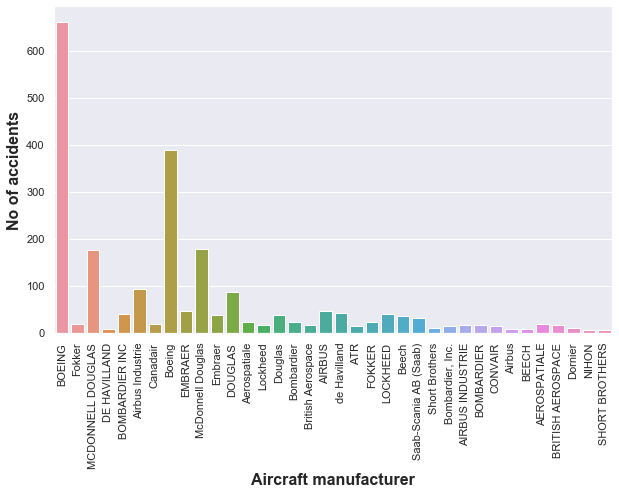

In [149]:
plt.figure(figsize = (10, 6))
sns.barplot(list(acft_make_counter_plot.keys()), list(acft_make_counter_plot.values()))
plt.xticks(rotation=90)
plt.xlabel('Aircraft manufacturer', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of accidents', fontsize = 16, fontweight = 'bold')

#### Accident VS event type

In [161]:
ev_type_counter = collections.Counter(events['ev_type'])
ev_type_counter

Counter({'ACC': 1149, 'INC': 1092, nan: 2})

Text(0, 0.5, 'No')

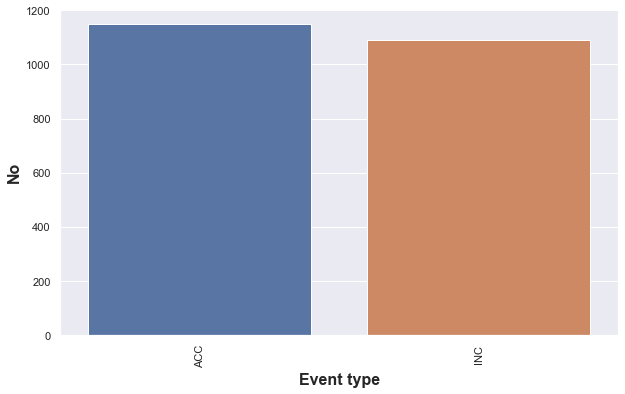

In [162]:
plt.figure(figsize = (10, 6))
sns.barplot(list(ev_type_counter.keys()), list(ev_type_counter.values()))
plt.xticks(rotation=90)
plt.xlabel('Event type', fontsize = 16, fontweight = 'bold')
plt.ylabel('No', fontsize = 16, fontweight = 'bold')

In [99]:
sample_ev_ID = '20030314X00332'
example = narratives[narratives['ev_id'] == sample_ev_ID]
list(example['narr_accp'])

['On March 8, 2003, at 1027 eastern standard time, a Fokker F-27MK 500, N712FE, registered to Federal Express Corporation and operated by Mountain Air Cargo Incorporated, right main landing gear collapse during an emergency landing at Kinston Regional Jetport, Kinston, North Carolina. The cargo flight was operated under the provision of Title 14 Part 121. Visual meteorological conditions prevailed at the time of the accident with an instrument flight plan filed. The airplane sustained substantial damage and the pilot and co-pilot were not injured. The flight departed Piedmont Triad International Airport, Greensboro, North Carolina, at 0816 on March 8, 2003. .\n\nAccording to the pilot, an unsafe right gear indication was received during approach to Craven County Regional, New Bern, North Carolina. During a flyby the control tower controller confirmed the right gear was not fully extended. The pilot declared an emergency and diverted to Kinston Regional Jetport to conduct an emergency l

In [100]:
list(example['narr_cause'])

['The fatigue failure of the main drag stay tube. A factor is no inspection procedure required.']

In [101]:
seq_of_events[seq_of_events['ev_id'] == sample_ev_ID]

,ev_id,Aircraft_Key,Occurrence_No,seq_event_no,group_code,Subj_Code,Cause_Factor,Modifier_Code,Person_Code,lchg_date,lchg_userid
465,20030314X00332,1,1,1,1,10403,C,1137,0.0,7/6/2004 15:23:06,JOHB


In [102]:
occurrences[occurrences['ev_id'] == sample_ev_ID]

,ev_id,Aircraft_Key,Occurrence_No,Occurrence_Code,Phase_of_Flight,Altitude,lchg_date,lchg_userid
117914,20030314X00332,1,1,130,572,0,7/6/2004 15:23:06,JOHB
117915,20030314X00332,1,2,190,572,0,7/6/2004 15:23:06,JOHB


In [103]:
aircraft.head()

,ev_id,Aircraft_Key,regis_no,ntsb_no,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,...,acft_year,fuel_on_board,commercial_space_flight,unmanned,ifr_equipped_cert,elt_mounted_aircraft,elt_connected_antenna,elt_manufacturer,elt_model,elt_reason_other
0,20140507X51410,1,N809DN,DCA14CA090,NaN,121,IFR,N,NONE,NONE,...,NaN,NaN,False,False,False,False,False,NaN,NaN,NaN
1,20030314X00332,1,N712FE,ATL03LA056,NaN,121,IFR,N,SUBS,GRD,...,NaN,NaN,False,False,False,False,False,NaN,NaN,NaN
2,20001212X18554,1,N142AA,CHI92IA061A,N,121,IFR,NaN,NONE,NONE,...,NaN,NaN,False,False,False,False,False,NaN,NaN,NaN
3,20001212X18554,2,N497AA,CHI92IA061B,N,121,IFR,NaN,NONE,NONE,...,NaN,NaN,False,False,False,False,False,NaN,NaN,NaN
4,20001212X23783,1,N175RA,NYC90IA178,N,121,IFR,NaN,MINR,NONE,...,NaN,NaN,False,False,False,False,False,NaN,NaN,NaN


In [57]:
Events_Sequence.head()

,ev_id,Aircraft_Key,Occurrence_No,Occurrence_Code,Occurrence_Description,Phase,Description,phase_no,eventsoe_no,Defining_ev,lchg_date,lchg_userid
0,20001208X08803,1,3,400240,Enroute - Loss of control in flight,Enroute,Loss of control in flight,400,240,1,5/13/2019 14:50:49,bowl
1,20001212X19469,1,1,550900,Landing - Miscellaneous/other,Landing,Miscellaneous/other,550,900,1,6/25/2015 14:54:25,sedj
2,20010304X00536,1,1,400350,Enroute - Security/criminal event,Enroute,Security/criminal event,400,350,1,6/25/2015 15:51:08,sedj
3,20010304X00536,2,1,400350,Enroute - Security/criminal event,Enroute,Security/criminal event,400,350,1,6/25/2015 15:51:23,sedj
4,20080109X00036,1,1,551230,Landing-flare/touchdown - Loss of control on g...,Landing,Loss of control on ground,551,230,1,11/16/2017 13:41:08,broda


In [52]:
acft_model_counter = collections.Counter(aircraft['acft_model'])
acft_model_counter

Counter({'737 - 932ER': 1,
         'F.27MK 500': 1,
         'DC-10-30': 21,
         'DC-9-82': 36,
         'DHC-7-102': 5,
         'CL-600-2C10': 11,
         '727-235': 3,
         'A319-114': 3,
         'CL-600-2B19': 43,
         '757-232': 21,
         '737-2H4': 7,
         'ERJ 170 100 SE': 3,
         'DC-10': 11,
         '727-200': 33,
         'ERJ170': 2,
         'DC-8-71': 7,
         '737-247': 3,
         '340B': 17,
         'ATR-42-300': 17,
         'DC-9-30': 9,
         'DC-10-10': 39,
         'L-188': 2,
         'DC-10-30F': 6,
         'BA-31': 1,
         '737-300-3H4': 1,
         'B-737-300': 3,
         'BAE 146': 1,
         '767-200ER': 3,
         '737 7H4': 15,
         '757-200': 12,
         'MD-11': 23,
         '737-2X6C': 2,
         'Jetstream 32': 1,
         '737-3B7': 7,
         'DC-8': 4,
         'MD-88': 26,
         '767-200': 6,
         '4101': 1,
         'MD-90-30': 4,
         '737-400': 13,
         '737': 32,
         'DC-9-51'

In [53]:
acft_make_counter = collections.Counter(aircraft['acft_make'])
acft_make_counter

Counter({nan: 1,
         118.0: 1,
         nan: 1,
         nan: 1,
         0.0: 132,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         14.0: 6,
         nan: 1,
         nan: 1,
         2.0: 14,
         2078.0: 1,
         874.0: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         2167.0: 1,
         nan: 1,
         7.0: 10,
         nan: 1,
         129.0: 3,
         274.0: 1,
         10.0: 13,
         nan: 1,
         nan: 1,
         3699.0: 1,
         9.4: 1,
         nan: 1,
         128.0: 3,
         nan: 1,
         104.2: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         256.0: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         326.0: 2,
         180.0: 1,
         nan: 1,
         794.0: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         19273.59: 1,
         147.0: 2,
         82.0: 3,
         nan: 1,
         75.0: 5,
   

In [31]:
Events_Sequence.head(2)

,ev_id,Aircraft_Key,Occurrence_No,Occurrence_Code,Occurrence_Description,phase_no,eventsoe_no,Defining_ev,lchg_date,lchg_userid
0,20001208X08803,1,3,400240,Enroute - Loss of control in flight,400,240,1,5/13/2019 14:50:49,bowl
1,20001212X19469,1,1,550900,Landing - Miscellaneous/other,550,900,1,6/25/2015 14:54:25,sedj


In [32]:
new = Events_Sequence["Occurrence_Description"].str.split("-", n = 1, expand = True)

Events_Sequence.insert(5, 'Phase', 'Unknown')
Events_Sequence.insert(6, 'Description', 'Unknown')
Events_Sequence['Phase'] = new[0].str.strip()
Events_Sequence['Description'] = new[1].str.strip()

In [33]:
Events_Sequence.head()

,ev_id,Aircraft_Key,Occurrence_No,Occurrence_Code,Occurrence_Description,Phase,Description,phase_no,eventsoe_no,Defining_ev,lchg_date,lchg_userid
0,20001208X08803,1,3,400240,Enroute - Loss of control in flight,Enroute,Loss of control in flight,400,240,1,5/13/2019 14:50:49,bowl
1,20001212X19469,1,1,550900,Landing - Miscellaneous/other,Landing,Miscellaneous/other,550,900,1,6/25/2015 14:54:25,sedj
2,20010304X00536,1,1,400350,Enroute - Security/criminal event,Enroute,Security/criminal event,400,350,1,6/25/2015 15:51:08,sedj
3,20010304X00536,2,1,400350,Enroute - Security/criminal event,Enroute,Security/criminal event,400,350,1,6/25/2015 15:51:23,sedj
4,20080109X00036,1,1,551230,Landing-flare/touchdown - Loss of control on g...,Landing,flare/touchdown - Loss of control on ground,551,230,1,11/16/2017 13:41:08,broda


In [34]:
second_phases = ['cruise', 'flare/touchdown', 'aerobatics', 'climb to cruise', 'landing roll', 'IFR initial approach', 
                 'IFR final approach', 'IFR missed approach', 'low-alt flying', 'VFR go-around', 'descent', 
                 'VFR pattern final', 'rejected takeoff', 'circling (IFR)']
def f(x):
    if '-' in x:
        if x.split('-')[0].strip() in second_phases:
            return x.split('-', 1)[1].strip()
    else:
        return x

Events_Sequence['Description'] = Events_Sequence['Description'].map(f)

#### Accident proportion by phases

In [35]:
df_events_sequences = Events_Sequence[Events_Sequence['ev_id'].isin(ev_ID)]

df_events_sequences.reset_index(inplace=True)
del df_events_sequences['index']

In [36]:
df_events_sequences.head()

,ev_id,Aircraft_Key,Occurrence_No,Occurrence_Code,Occurrence_Description,Phase,Description,phase_no,eventsoe_no,Defining_ev,lchg_date,lchg_userid
0,20080118X00073,1,1,200200,Pushback/towing - Ground collision,Pushback/towing,Ground collision,200,200,1,2/2/2009 13:27:45,mcgk-c
1,20080118X00073,2,1,200200,Pushback/towing - Ground collision,Pushback/towing,Ground collision,200,200,1,2/2/2009 13:28:51,mcgk-c
2,20080222X00229,1,1,401900,Enroute-climb to cruise - Miscellaneous/other,Enroute,Miscellaneous/other,401,900,1,12/23/2008 15:40:20,stam
3,20080222X00229,1,2,402900,Enroute-cruise - Miscellaneous/other,Enroute,Miscellaneous/other,402,900,0,12/23/2008 15:40:20,stam
4,20080305X00267,1,1,404360,Enroute-descent - Turbulence encounter,Enroute,Turbulence encounter,404,360,1,7/28/2009 14:59:12,grol


In [37]:
import collections

counter = collections.Counter(df_events_sequences['Phase'])
counter

Counter({'Pushback/towing': 20,
         'Enroute': 170,
         'Taxi': 48,
         'Standing': 41,
         'Takeoff': 34,
         'Landing': 91,
         'Prior to flight': 25,
         'Initial climb': 37,
         'Approach': 46,
         'Pushback/tow': 14,
         'Post': 6,
         'Other': 9,
         'Unknown': 4,
         'Emergency descent': 2,
         'Uncontrolled descent': 1,
         'After landing': 4})

Text(0, 0.5, 'Proportion')

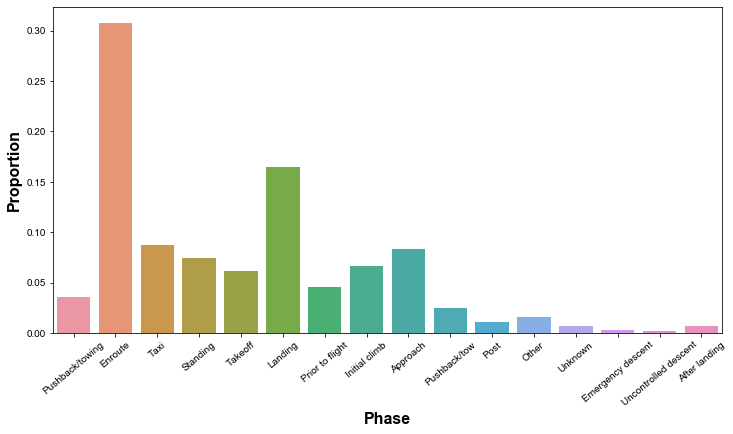

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

proportion = np.array(list(counter.values()))/sum(list(counter.values()))

plt.figure(figsize = (12, 6))
sns.barplot(x = list(counter.keys()), y = proportion)
sns.set(font_scale=1)
plt.xticks(rotation=40)
plt.xlabel('Phase', fontsize = 16, fontweight = 'bold')
plt.ylabel('Proportion', fontsize = 16, fontweight = 'bold')

#### Create raw transition graph from the Table Events_Sequence

In [39]:
nodeDesp = list(df_events_sequences['Description'].unique())

In [40]:
def findDespByID(ID):
    desp = df_events_sequences.loc[df_events_sequences['ev_id'] == ID]
    return list(desp['Description'])

dictEdges = {}

for ID in df_events_sequences['ev_id']:
    desp = findDespByID(ID)
    
    if len(desp) == 1:
        nodeFrom = nodeDesp.index(desp[0])
        nodeTo = nodeDesp.index(desp[0])
        
        key = str(nodeFrom)
        
        if key in dictEdges.keys():
            dictEdges[key] = dictEdges[key] + 1  
        else:
            dictEdges[key] = 1    
    else:
        for i in range(len(desp) - 1):
            nodeFrom = nodeDesp.index(desp[i])
            nodeTo = nodeDesp.index(desp[i+1])

            key = str(nodeFrom) + '->' + str(nodeTo)
            
            if key in dictEdges.keys():
                dictEdges[key] = dictEdges[key] + 1
            else:
                dictEdges[key] = 1

In [41]:
import operator

sorted_x = sorted(dictEdges.items(), key=operator.itemgetter(1))

In [42]:
import pygraphviz as pgv
from IPython.display import display, Image

def drawImage(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

def drawPDF(dot, fileName):
    return pgv.AGraph(dot).draw(fileName + '.pdf', prog='dot')

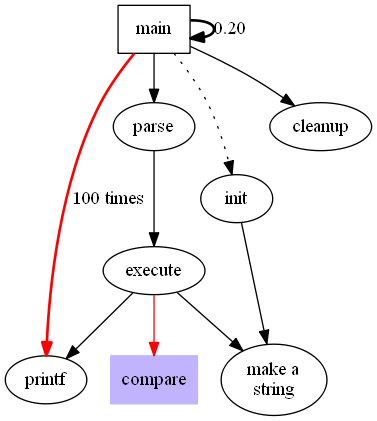

In [43]:
g1 = """digraph top {
    size ="12,12";
    main [shape=box]; /* this is a comment */
    main -> parse [weight=80];
    main -> main [style=bold, label="0.20"];
    parse -> execute;
    main -> init [style=dotted];
    main -> cleanup;
    execute -> { make_string; printf}
    init -> make_string;
    edge [color=red]; // so is this
    main -> printf [style=bold,label="100 times"];
    make_string [label="make a\nstring"];
    node [shape=box,style=filled,color=".7 .3 1.0"];
    execute -> compare;
}"""


drawImage(g1)

In [44]:
def create_graph():
    g = """digraph top {
    size ="12,12";"""
    
    for key, value in dictEdges.items():
        
        if '->' in key:
            nodeFrom = key.split('->')[0]
            nodeTo = key.split('->')[1]
            g += str(nodeFrom) + '->' + str(nodeTo) + '[style=bold, label=' + str(value) + ']'
  
    g += '}'
    
    return g

In [45]:
nodeDesp[21]

'Fire/smoke (non-impact)'

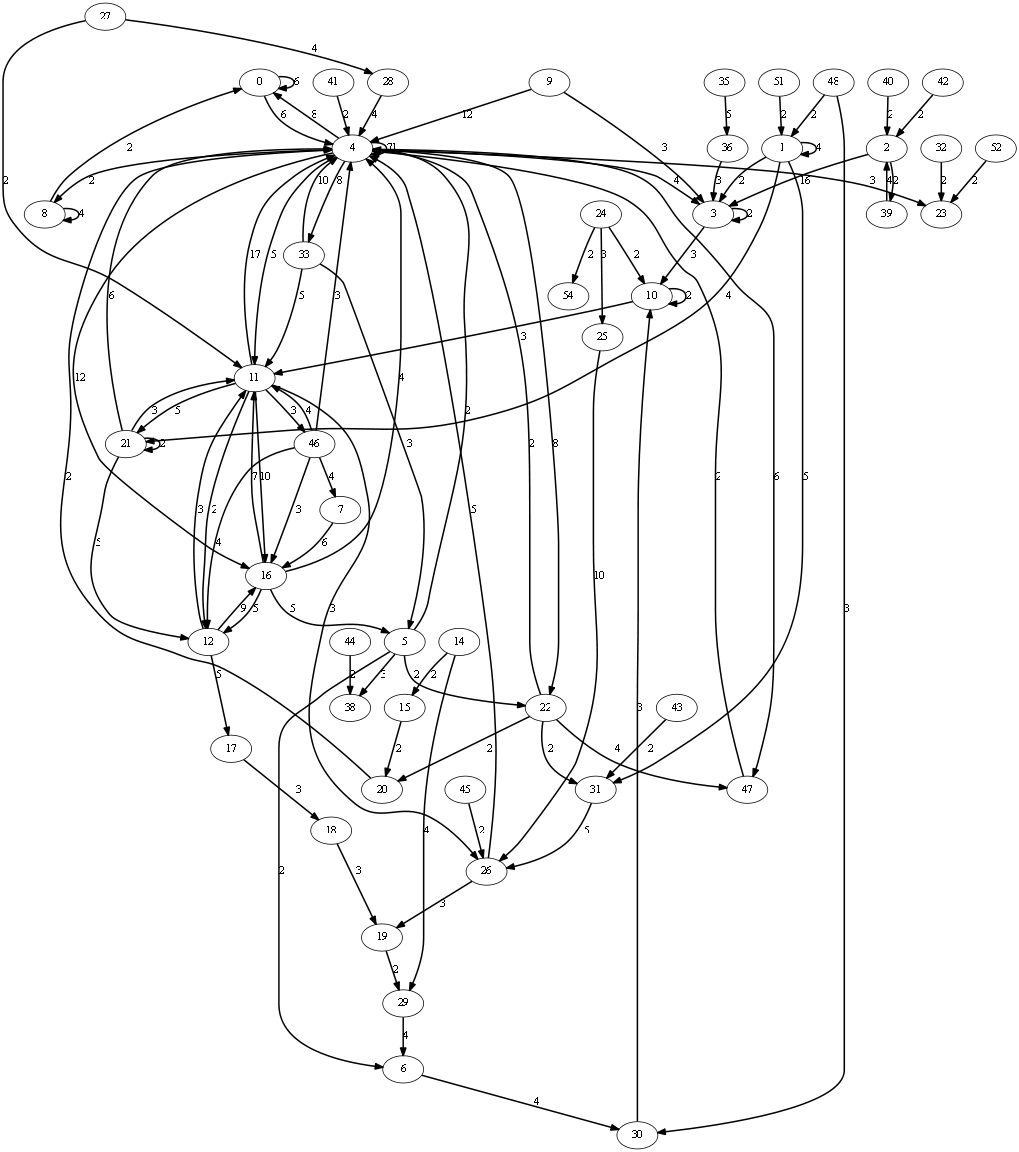

In [46]:
g = create_graph()
drawPDF(g, 'test')
drawImage(g)

#### Create compressed network from Table seq_of_events

In [47]:
initialIDs = set(occurrences['ev_id']).intersection(set(seq_of_events['ev_id']))
part120_IDs = set(sum(aircraft.values.tolist(), []))

ev_ID = list(initialIDs.intersection(part120_IDs))

In [48]:
eventCodes.head()

,code,meaning
0,100,ABRUPT MANEUVER
1,110,"ALTITUDE DEVIATION,UNCONTROLLED"
2,120,CARGO SHIFT
3,130,AIRFRAME/COMPONENT/SYSTEM FAILURE/MALFUNCTION
4,131,PROPELLER FAILURE/MALFUNCTION


In [91]:
df_seq_of_events = seq_of_events[seq_of_events['ev_id'].isin(ev_ID)].copy()

df_seq_of_events.drop(df_seq_of_events.index[6218], inplace = True)
df_seq_of_events.reset_index(inplace=True)
del df_seq_of_events['index']

In [92]:
df_seq_of_events.head()

,ev_id,Aircraft_Key,Occurrence_No,seq_event_no,group_code,Subj_Code,Cause_Factor,Modifier_Code,Person_Code,lchg_date,lchg_userid
0,20030314X00332,1,1,1,1,10403,C,1137,0.0,7/6/2004 15:23:06,JOHB
1,20001212X18554,1,1,1,2,24602,F,3130,4000.0,1/10/2001 10:43:11,dbo
2,20001212X18554,1,1,2,2,24608,C,3130,4111.0,1/10/2001 10:43:11,dbo
3,20001212X18554,1,1,3,4,90000,F,0,6110.0,1/10/2001 10:43:11,dbo
4,20001212X18554,1,1,4,2,24604,F,3134,4111.0,1/10/2001 10:43:11,dbo


In [93]:
df_seq_of_events.insert(6, 'Grouped_Subject_Code', None)
df_seq_of_events.insert(7, 'Simple_Subject_Code', None)

In [94]:
df_seq_of_events['Grouped_Subject_Code'] = df_seq_of_events['Subj_Code'].copy()
df_seq_of_events['Simple_Subject_Code'] = df_seq_of_events['Subj_Code'].copy()

def updateGroupSubjectCode(code):
    codeList = []
    
    if int(str(code)[:-2] + '00') in codeList:
        return code
    else:
        return int(str(code)[:-2] + '00')

df_seq_of_events['Grouped_Subject_Code'] = df_seq_of_events['Grouped_Subject_Code'].map(updateGroupSubjectCode)
df_seq_of_events['Simple_Subject_Code'] = df_seq_of_events['Subj_Code'].map(updateGroupSubjectCode)

In [95]:
df_seq_of_events.head()

,ev_id,Aircraft_Key,Occurrence_No,seq_event_no,group_code,Subj_Code,Grouped_Subject_Code,Simple_Subject_Code,Cause_Factor,Modifier_Code,Person_Code,lchg_date,lchg_userid
0,20030314X00332,1,1,1,1,10403,10400,10400,C,1137,0.0,7/6/2004 15:23:06,JOHB
1,20001212X18554,1,1,1,2,24602,24600,24600,F,3130,4000.0,1/10/2001 10:43:11,dbo
2,20001212X18554,1,1,2,2,24608,24600,24600,C,3130,4111.0,1/10/2001 10:43:11,dbo
3,20001212X18554,1,1,3,4,90000,90000,90000,F,0,6110.0,1/10/2001 10:43:11,dbo
4,20001212X18554,1,1,4,2,24604,24600,24600,F,3134,4111.0,1/10/2001 10:43:11,dbo


In [96]:
eventCodes[eventCodes['code'] == 31100]

,code,meaning


In [97]:
def findKeyByValue(val, highLevelGroup):
    for k, v in highLevelGroup.items():
        if val in v:
            return k
        
def mapToHigherLevel(code):
    
    highLevelGroup = {
        9910001: [10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 11300, 13000],
        9912001: [12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13100],
        9913001: [14000, 14100, 14200, 14300, 14400, 14500, 14600, 14700, 14800, 14900, 15000, 15100, 15200,
                  15300, 15400, 15600, 15700, 15800, 15900, 16000, 16700, 16900],
        9914001: [17000, 17100, 17200, 17300],
        9915001: [18100, 18200, 18300, 18400, 18500, 19000, 19300],
        9916001: [21000, 21100],
        9918001: [19200, ],
        9919001: [20200],
        9920001: [20000],
        9930001: [20100],
        9940001: [22000, 22100, 22200, 22300, 22400, 22500, 22600, 22700, 22800, 22900, 23000, 23100, 23300],
        9950001: [24000, 24100, 24200, 24300, 24400, 24500, 24600, 24700, 25000],
        9960001: [30000, 30001, 31000, 31100, 31200, 32000, 33000, 33100, 34000, 
                  33200, 33400, 33500, 33600, 33700, 34100, 34200, 34300, 40000, 40001, 50001, 60000],
        9970001: [35000, 35100, 35200, 35300, 70100, 80100, 80200, 80300, 80400, 84100, 84200,
                  70000, 80000, 82000, 82100, 82200, 84000],
        9980001: [90000, 91000, 92000, 93000, 90100, 90200, 91100, 91200, 91300, 91400, 91500, 92200, 92300, 92400, 
                  93100, 93200, 93300]
    }
    
    
    allValues = sum(list(highLevelGroup.values()), [])
    
    if code in allValues:
        key = findKeyByValue(code, highLevelGroup)
        return key
    else:
        return code
    
df_seq_of_events['Grouped_Subject_Code'] = df_seq_of_events['Grouped_Subject_Code'].map(mapToHigherLevel)

In [98]:
df_seq_of_events.head(2)

,ev_id,Aircraft_Key,Occurrence_No,seq_event_no,group_code,Subj_Code,Grouped_Subject_Code,Simple_Subject_Code,Cause_Factor,Modifier_Code,Person_Code,lchg_date,lchg_userid
0,20030314X00332,1,1,1,1,10403,9910001,10400,C,1137,0.0,7/6/2004 15:23:06,JOHB
1,20001212X18554,1,1,1,2,24602,9950001,24600,F,3130,4000.0,1/10/2001 10:43:11,dbo


In [99]:
subjectCodes = sorted(list(df_seq_of_events['Grouped_Subject_Code'].unique()))

In [100]:
df_seq_of_events.head(3)

,ev_id,Aircraft_Key,Occurrence_No,seq_event_no,group_code,Subj_Code,Grouped_Subject_Code,Simple_Subject_Code,Cause_Factor,Modifier_Code,Person_Code,lchg_date,lchg_userid
0,20030314X00332,1,1,1,1,10403,9910001,10400,C,1137,0.0,7/6/2004 15:23:06,JOHB
1,20001212X18554,1,1,1,2,24602,9950001,24600,F,3130,4000.0,1/10/2001 10:43:11,dbo
2,20001212X18554,1,1,2,2,24608,9950001,24600,C,3130,4111.0,1/10/2001 10:43:11,dbo


In [101]:
def findEventSequence(ev_id):
    seqs = df_seq_of_events.loc[df_seq_of_events['ev_id'] == ev_id][['seq_event_no', 'Grouped_Subject_Code']]
    return seqs.drop_duplicates(subset = ['seq_event_no', 'Grouped_Subject_Code'])

def findEventOutcomes(ev_id):
    outcomes = occurrences.loc[occurrences['ev_id'] == ev_id][['Occurrence_No', 'Occurrence_Code']].copy()
    return outcomes.drop_duplicates(subset = ['Occurrence_No', 'Occurrence_Code'])


dictEventSequences = {}
for ID in ev_ID:
    
    seq = findEventSequence(ID)
    leafNodes = []

    if len(seq) > 0:
        for i in range(len(seq) - 1):
            if seq.iloc[i]['seq_event_no'] < seq.iloc[i+1]['seq_event_no']:
                codeFrom = seq.iloc[i]['Grouped_Subject_Code']
                codeTo = seq.iloc[i+1]['Grouped_Subject_Code']

                key = str(codeFrom) + '->' + str(codeTo)

                if key in dictEventSequences.keys():
                    dictEventSequences[key] += 1
                else:
                    dictEventSequences[key] = 1 
            else:
                leafNodes.append(seq.iloc[i]['Grouped_Subject_Code'])


        leafNodes.append(seq.iloc[-1]['Grouped_Subject_Code'])
        outcomes = findEventOutcomes(ID)

        ## connect leaft Nodes with event outcomes:
        for i in leafNodes:
            codeFrom = i
            codeTo = outcomes.iloc[0]['Occurrence_Code']

            key = str(codeFrom) + '->' + str(codeTo)
            if key in dictEventSequences.keys():
                dictEventSequences[key] += 1
            else:
                dictEventSequences[key] = 1

        outcomeLens = outcomes.shape[0]

        if outcomeLens > 1:
            for i in range(outcomeLens - 1):
                codeFrom = outcomes.iloc[i]['Occurrence_Code']
                codeTo = outcomes.iloc[i+1]['Occurrence_Code']

                key = str(codeFrom) + '->' + str(codeTo)

                if key in dictEventSequences.keys():
                    dictEventSequences[key] += 1
                else:
                    dictEventSequences[key] = 1

In [102]:
def createBN():
    occurrencesCodes = list(set(occurrences['Occurrence_Code']))
    
    g = """digraph top {
    \tsize ="12,12"; \n \t"""
    
    g += """bgcolor="transparent"; \n """
    g_node_style = ''
    
    threshold = 10
    
    count = 0
    for key, value in dictEventSequences.items():
        
        #if count < 100:
        if '->' in key:
            nodeFrom = int(key.split('->')[0])
            nodeTo = int(key.split('->')[1])

            #if nodeFrom != nodeTo:
            #    print (nodeFrom, '-->', nodeTo)

            if nodeFrom in occurrencesCodes and value > threshold:
                g += str(nodeFrom) + '->' + str(nodeTo) + ' [label=' + str(value) + ', fontsize=16, penwidth=3, \
                color = white, fontcolor = white, fontsize = 16]'
                g += '\n\t'

                g_node_style += str(nodeFrom) + """ [style=filled, color="gold"]"""
                g_node_style += '\n\t'
            elif nodeTo in occurrencesCodes and value > threshold:
                g += str(nodeFrom) + '->' + str(nodeTo) + ' [label=' + str(value) + ', fontsize=16, penwidth=3, \
                color = white, fontcolor = white, fontsize = 16]'
                g += '\n\t'

                g_node_style += str(nodeTo) + """ [style=filled, color="gold"]"""
                g_node_style += '\n\t'
            elif value > threshold:
                g += str(nodeFrom) + '->' + str(nodeTo) + ' [style=bold, label=' + str(value) + ', fontsize=16, \
                            penwidth=3, color = white, fontcolor = white, fontsize = 16]'
                g += '\n\t'
                
                g_node_style += str(nodeTo) + """ [style=filled, color="green", fontsize = 16]"""
                g_node_style += '\n\t'

            #count += 1
      
    g += g_node_style
    g = g[:-1]
    g += '}'
    
    return g

In [103]:
len(subjectCodes)

15

In [104]:
eventCodes[eventCodes['code'] == 10001]

,code,meaning
633,10001,"FUSELAGE,CREW COMPARTMENT"


In [105]:
subjectCodes

[9910001,
 9912001,
 9913001,
 9914001,
 9915001,
 9916001,
 9918001,
 9919001,
 9920001,
 9930001,
 9940001,
 9950001,
 9960001,
 9970001,
 9980001]

In [106]:
dictSubjectCodes = {}
for i in range(1, len(subjectCodes)+1):
    dictSubjectCodes[subjectCodes[i-1]] = i

In [107]:
dictEventSequences

{'9920001->9950001': 148,
 '9950001->240': 93,
 '9910001->9910001': 216,
 '9910001->130': 200,
 '9910001->9950001': 182,
 '9950001->9910001': 91,
 '9940001->130': 27,
 '130->320': 5,
 '9913001->9914001': 18,
 '9914001->9950001': 48,
 '9950001->9950001': 669,
 '9950001->171': 19,
 '171->430': 10,
 '9920001->240': 136,
 '9950001->430': 112,
 '9970001->430': 14,
 '9980001->430': 4,
 '430->430': 11,
 '9950001->130': 182,
 '130->230': 8,
 '9912001->140': 2,
 '9912001->9950001': 68,
 '130->340': 6,
 '9920001->9940001': 47,
 '9940001->240': 55,
 '9913001->130': 45,
 '9913001->9913001': 166,
 '130->351': 5,
 '351->171': 9,
 '9919001->9950001': 70,
 '9950001->9920001': 67,
 '9920001->9920001': 147,
 '9920001->310': 6,
 '9960001->9950001': 66,
 '9940001->160': 2,
 '9950001->160': 24,
 '9950001->9919001': 42,
 '9919001->360': 1,
 '9919001->310': 53,
 '9950001->310': 119,
 '9912001->9912001': 122,
 '9912001->130': 88,
 '9940001->9940001': 52,
 '9940001->9950001': 66,
 '9915001->9918001': 4,
 '9914

In [108]:
eventCodes[eventCodes['code'] == 320]

,code,meaning
37,320,ON GROUND/WATER ENCOUNTER WITH TERRAIN/WATER


In [109]:
eventCodes.head()

,code,meaning
0,100,ABRUPT MANEUVER
1,110,"ALTITUDE DEVIATION,UNCONTROLLED"
2,120,CARGO SHIFT
3,130,AIRFRAME/COMPONENT/SYSTEM FAILURE/MALFUNCTION
4,131,PROPELLER FAILURE/MALFUNCTION


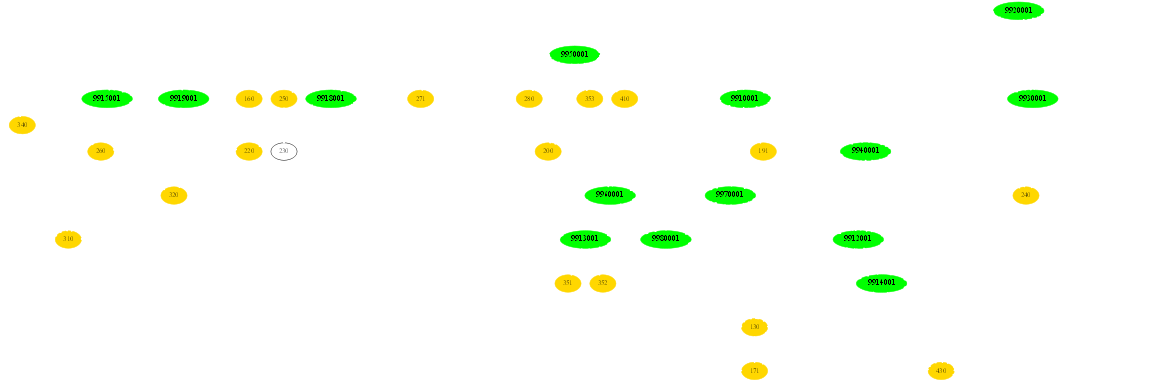

In [119]:
BN = createBN()
drawImage(BN)

In [118]:
drawPDF(BN, 'BN')

### Challenges:

#### 1. How to detect loop in the constructed graph
#### 2. How to break the loop
#### 3. Visualization --> too many nodes

In [320]:
df_seq_of_events.head()

,ev_id,Aircraft_Key,Occurrence_No,seq_event_no,group_code,Subj_Code,Grouped_Subject_Code,Simple_Subject_Code,Cause_Factor,Modifier_Code,Person_Code,lchg_date,lchg_userid
0,20030314X00332,1,1,1,1,10403,9910001,10400,C,1137,0.0,7/6/2004 15:23:06,JOHB
1,20001212X18554,1,1,1,2,24602,9950001,24600,F,3130,4000.0,1/10/2001 10:43:11,dbo
2,20001212X18554,1,1,2,2,24608,9950001,24600,C,3130,4111.0,1/10/2001 10:43:11,dbo
3,20001212X18554,1,1,3,4,90000,9980001,90000,F,0,6110.0,1/10/2001 10:43:11,dbo
4,20001212X18554,1,1,4,2,24604,9950001,24600,F,3134,4111.0,1/10/2001 10:43:11,dbo


In [321]:
def findEventSequenceSimpleCode(ev_id):
    seqs = df_seq_of_events.loc[df_seq_of_events['ev_id'] == ev_id][['seq_event_no', 'Simple_Subject_Code']]
    return seqs.drop_duplicates(subset = ['seq_event_no', 'Simple_Subject_Code'])

def findEventOutcomesSimpleCode(ev_id):
    outcomes = occurrences.loc[occurrences['ev_id'] == ev_id][['Occurrence_No', 'Occurrence_Code']].copy()
    return outcomes.drop_duplicates(subset = ['Occurrence_No', 'Occurrence_Code'])

In [322]:
dictBN = {}
nodeList = []

for ID in ev_ID:
    
    seq = findEventSequenceSimpleCode(ID)
    leafNodes = []

    if len(seq) > 0:
        for i in range(len(seq) - 1):
            if seq.iloc[i]['seq_event_no'] < seq.iloc[i+1]['seq_event_no']:
                codeFrom = seq.iloc[i]['Simple_Subject_Code']
                codeTo = seq.iloc[i+1]['Simple_Subject_Code']
                
                nodeList.append(codeFrom)
                nodeList.append(codeTo)

                key = str(codeFrom) + '->' + str(codeTo)

                if key in dictBN.keys():
                    dictBN[key] += 1
                else:
                    dictBN[key] = 1 
            else:
                leafNodes.append(seq.iloc[i]['Simple_Subject_Code'])

        leafNodes.append(seq.iloc[-1]['Simple_Subject_Code'])
        outcomes = findEventOutcomesSimpleCode(ID)

        ## connect leaft Nodes with event outcomes:
        for i in leafNodes:
            codeFrom = i
            codeTo = outcomes.iloc[0]['Occurrence_Code']
            
            nodeList.append(codeFrom)
            nodeList.append(codeTo)

            key = str(codeFrom) + '->' + str(codeTo)
            if key in dictBN.keys():
                dictBN[key] += 1
            else:
                dictBN[key] = 1

        outcomeLens = outcomes.shape[0]

        if outcomeLens > 1:
            for i in range(outcomeLens - 1):
                codeFrom = outcomes.iloc[i]['Occurrence_Code']
                codeTo = outcomes.iloc[i+1]['Occurrence_Code']
                
                nodeList.append(codeFrom)
                nodeList.append(codeTo)

                key = str(codeFrom) + '->' + str(codeTo)

                if key in dictBN.keys():
                    dictBN[key] += 1
                else:
                    dictBN[key] = 1

#### Construct transition matrix

In [46]:
#### Label each node with a sequential number
#### Detect loops in the network 
#### Find the direction of observed node --> consequence

import networkx as nx
G = nx.DiGraph()

count = len(set(nodeList)) 
nodeIDList = list(set(nodeList))
TP = np.zeros(shape = (count, count))
    
## add node
for i in range(1, count):
    G.add_node(i)

## add edges
for i in dictBN:
    nodeFrom, nodeTo = int(i.split('->')[0]), int(i.split('->')[1])
    #print (nodeFrom, nodeTo)
    #if nodeFrom != nodeTo:
        #print (str(nodeFrom) + '->' + str(nodeTo))
        #print (dictBN[str(nodeFrom) + '->' + str(nodeTo)])
    G.add_edge(nodeFrom, nodeTo)
        
    if nodeTo == 290:
        #pass
        print (str(nodeFrom) + '->' + str(nodeTo), dictBN[i])
        
    TP[nodeIDList.index(nodeFrom), nodeIDList.index(nodeTo)] = dictBN[i]
    
    #print (nodeIDList.index(nodeFrom), nodeIDList.index(nodeTo), dictBN[i])
    
    if nodeIDList.index(nodeFrom) == 1:
        pass
        #print (nodeIDList.index(nodeFrom))

192->290 1
196->290 1
130->290 1


In [47]:
TP

array([[6., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 6., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 5., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [48]:
N = TP.shape[0]

for i in range(TP.shape[0]):
    if sum(TP[i, :]) == 0:
        TP[i, i] = 1

In [49]:
row_sums = TP.sum(axis=1)
TP = TP / row_sums[:, np.newaxis]

In [50]:
nodeIDs = set(nodeList)

for id in nodeIDs:
    try:
        res = nx.find_cycle(G, source = id, orientation='original')
        if id == res[0][0]:
            print (res)
    except:
        pass

[(12800, 12800, 'forward')]
[(24700, 80000, 'forward'), (80000, 91300, 'forward'), (91300, 24700, 'forward')]
[(80000, 91300, 'forward'), (91300, 24700, 'forward'), (24700, 80000, 'forward')]
[(130, 230, 'forward'), (230, 340, 'forward'), (340, 310, 'forward'), (310, 192, 'forward'), (192, 130, 'forward')]
[(140, 140, 'forward')]
[(10400, 10400, 'forward')]
[(160, 200, 'forward'), (200, 160, 'forward')]
[(91300, 24700, 'forward'), (24700, 80000, 'forward'), (80000, 91300, 'forward')]
[(192, 130, 'forward'), (130, 230, 'forward'), (230, 340, 'forward'), (340, 310, 'forward'), (310, 192, 'forward')]
[(200, 160, 'forward'), (160, 200, 'forward')]
[(12500, 12500, 'forward')]
[(230, 340, 'forward'), (340, 310, 'forward'), (310, 192, 'forward'), (192, 130, 'forward'), (130, 230, 'forward')]
[(310, 192, 'forward'), (192, 130, 'forward'), (130, 230, 'forward'), (230, 340, 'forward'), (340, 310, 'forward')]
[(12100, 31100, 'forward'), (31100, 12100, 'forward')]
[(340, 310, 'forward'), (310, 192

### Forward propagation

In [51]:
set(df_seq_of_events['Simple_Subject_Code'])

{10000,
 10100,
 10200,
 10300,
 10400,
 10500,
 10600,
 10700,
 10800,
 11300,
 12000,
 12100,
 12200,
 12300,
 12400,
 12500,
 12600,
 12700,
 12800,
 12900,
 13000,
 13100,
 14000,
 14100,
 14200,
 14300,
 14400,
 14500,
 14600,
 14700,
 14800,
 14900,
 15000,
 15100,
 15200,
 15300,
 15400,
 15600,
 15700,
 15800,
 15900,
 16000,
 16700,
 16900,
 17000,
 17100,
 17200,
 17300,
 18100,
 18200,
 18300,
 18400,
 18500,
 19000,
 19200,
 19300,
 20000,
 20100,
 20200,
 21000,
 21100,
 22000,
 22100,
 22200,
 22300,
 22400,
 22500,
 22600,
 22700,
 22800,
 22900,
 23000,
 23100,
 23300,
 24000,
 24100,
 24200,
 24300,
 24400,
 24500,
 24600,
 24700,
 25000,
 30000,
 31100,
 31200,
 32000,
 33000,
 33100,
 33200,
 33400,
 33500,
 33600,
 33700,
 34000,
 34100,
 34200,
 34300,
 35000,
 35100,
 35200,
 35300,
 40000,
 60000,
 70000,
 70100,
 80000,
 80100,
 80200,
 80300,
 80400,
 82000,
 82100,
 82200,
 84000,
 84100,
 84200,
 90000,
 90100,
 90200,
 91000,
 91100,
 91200,
 91300,
 91400,


In [52]:
state = 22600
eventCodes[eventCodes['code']== state]

,code,meaning
1741,22600,ANTI-ICE/DEICE SYSTEM


In [53]:
initialState = np.zeros(shape = (N, 1)).flatten()

startNodeID = nodeIDList.index(state)
initialState[startNodeID] = 1

In [54]:
startNode = [state]

In [55]:
dictForwardGraph = {}

for i in range(1000):
    initialState = np.dot(TP.transpose(), initialState)
    
    #print (nodeIDList[np.argmax(initialState)])
    #print (initialState[[41, 66, 69, 109]])
    
    for s in startNode:
        # calculate the sum of all counts
        count = 0
        for key, val in dictBN.items():
            if str(s) + '->' in key:
                count = count + val

        startNode = []
        for key, val in dictBN.items():
            if str(s) + '->' in key and val/count > 0.05:
                t = key.split('->')[1]
                
                startNode.append(t)
                
                dictForwardGraph[str(s) + '->' + str(t)] = val/count

In [56]:
def createFowardPropagation(FPN):
    
    g = """digraph top {
    \tsize ="12,12"; \n \t"""

    g_node_style = ''
    
    for key, value in FPN.items():

        if '->' in key:
            nodeFrom = int(key.split('->')[0])
            nodeTo = int(key.split('->')[1])
            g += str(nodeFrom) + '->' + str(nodeTo) + ' [label=' + str(round(value, 2)) + ']'
            g += '\n\t'
      
    g += g_node_style
    g = g[:-1]
    g += '}'
    
    return g

In [57]:
FPN = createFowardPropagation(dictForwardGraph)
drawImage(FPN)
drawPDF(FPN, 'FPN')

In [58]:
eventIndices = np.where(initialState > 0.001)

dictOutcome = {}

for i in list(eventIndices[0]):
    code = nodeIDList[i]
    meaning = eventCodes[eventCodes['code']== code]['meaning']
    p = initialState[i]
    
    dictOutcome[code] = p

In [59]:
dictOutcome

{0: 0.012270664217011644,
 140: 0.10466378306330312,
 150: 0.02735200547416189,
 195: 0.027578118071082645,
 232: 0.08676583710364927,
 290: 0.7264354854715852,
 370: 0.01476748909941251}

Text(0, 0.5, 'Probability of occurrence')

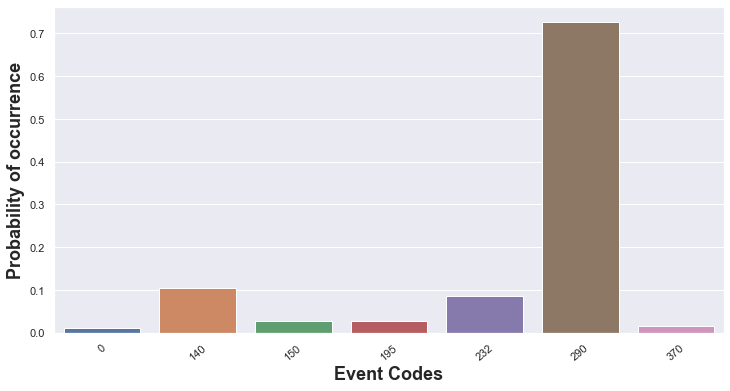

In [60]:
plt.figure(figsize = (12, 6))

sns.barplot(x = list(dictOutcome.keys()), y = list(dictOutcome.values()))
sns.set(font_scale=1)
plt.xticks(rotation=40)

plt.xlabel('Event Codes', fontsize = 18, fontweight = 'bold')
plt.ylabel('Probability of occurrence', fontsize = 18, fontweight = 'bold')

In [61]:
eventCodes[eventCodes['code']== 0]

,code,meaning


### Backward inference

In [62]:
TP = np.array([[0.2, 0.2, 0.6], [0, 0.7, 0.3], [0.5, 0.5, 0]])

In [63]:
s = np.array([0.2, 0.6, 0.2])

In [64]:
for i in range(1000):
    s = np.dot(TP.transpose(), s)
    s = s/np.sum(s)

In [65]:
s

array([0.16853933, 0.56179775, 0.26966292])

In [66]:
tmp = TP.transpose()
for i in range(100):
    tmp = np.dot(TP.transpose(), tmp)

In [67]:
tmp

array([[0.16853933, 0.16853933, 0.16853933],
       [0.56179775, 0.56179775, 0.56179775],
       [0.26966292, 0.26966292, 0.26966292]])

In [68]:
np.dot(tmp, s)

array([0.16853933, 0.56179775, 0.26966292])